In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [21]:
df_raw = pd.read_csv("../data/oecd_bli_combined.csv") # lê CSV e transforma em tabela

In [22]:
df_raw.head()

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,...,OBS_VALUE,Observation Value,OBS_STATUS,Observation Status,UNIT_MEASURE,Unit of Measures,UNIT_MULT,Multiplier,BASE_PER,Base reference period
0,DATAFLOW,OECD:DF_BLI(1.0),Better Life Index,I,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,...,2.3,NaN,A,NaN,PC,Percentage,0,Units,NaN,NaN
1,DATAFLOW,OECD:DF_BLI(1.0),Better Life Index,I,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,...,2.4,NaN,A,NaN,PC,Percentage,0,Units,NaN,NaN
2,DATAFLOW,OECD:DF_BLI(1.0),Better Life Index,I,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,...,3.8,NaN,A,NaN,PC,Percentage,0,Units,NaN,NaN
3,DATAFLOW,OECD:DF_BLI(1.0),Better Life Index,I,CZE,Czechia,JE_LMIS,Labour market insecurity,L,Value,...,2.3,NaN,A,NaN,PC,Percentage,0,Units,NaN,NaN
4,DATAFLOW,OECD:DF_BLI(1.0),Better Life Index,I,DNK,Denmark,JE_LMIS,Labour market insecurity,L,Value,...,4.5,NaN,A,NaN,PC,Percentage,0,Units,NaN,NaN


In [23]:
df_filtered = df_raw[["Country", "Indicator", "OBS_VALUE"]].copy() # copy() garante que df_filtered seja uma cópia independente (boa prática)

In [24]:
df_filtered.head()

,Country,Indicator,OBS_VALUE
0,Austria,Labour market insecurity,2.3
1,Belgium,Labour market insecurity,2.4
2,Canada,Labour market insecurity,3.8
3,Czechia,Labour market insecurity,2.3
4,Denmark,Labour market insecurity,4.5


In [25]:
df_life = df_filtered[df_filtered["Indicator"] == "Life satisfaction"].copy()

In [26]:
df_life.head()

,Country,Indicator,OBS_VALUE
35,Australia,Life satisfaction,7.1
36,Austria,Life satisfaction,7.2
37,Belgium,Life satisfaction,6.8
38,Canada,Life satisfaction,7.0
39,Czechia,Life satisfaction,6.9


In [27]:
df_work = df_filtered[df_filtered["Indicator"] == "Labour market insecurity"].copy()

In [28]:
df_work.head()

,Country,Indicator,OBS_VALUE
0,Austria,Labour market insecurity,2.3
1,Belgium,Labour market insecurity,2.4
2,Canada,Labour market insecurity,3.8
3,Czechia,Labour market insecurity,2.3
4,Denmark,Labour market insecurity,4.5


In [30]:
df_life.rename(columns={"OBS_VALUE": "Life Satisfaction"}, inplace=True)

In [31]:
df_work.rename(columns={"OBS_VALUE": "Labour Insecurity"}, inplace=True)

In [32]:
df = pd.merge(
    df_life[["Country", "Life Satisfaction"]],
    df_work[["Country", "Labour Insecurity"]],
    on="Country"
)

In [36]:
df.head()

,Country,Life Satisfaction,Labour Insecurity
0,Australia,7.1,3.1
1,Austria,7.2,2.3
2,Belgium,6.8,2.4
3,Canada,7.0,3.8
4,Czechia,6.9,2.3


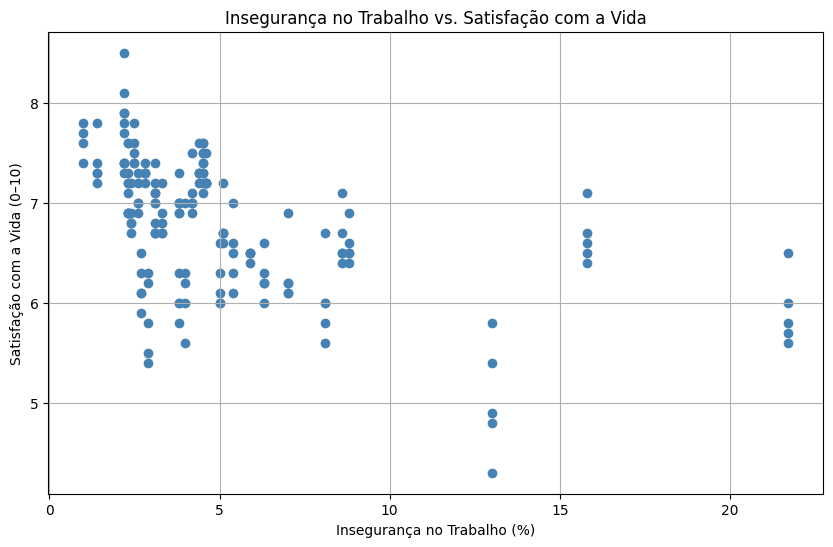

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(df["Labour Insecurity"], df["Life Satisfaction"], color='steelblue')
plt.title("Insegurança no Trabalho vs. Satisfação com a Vida")
plt.xlabel("Insegurança no Trabalho (%)")
plt.ylabel("Satisfação com a Vida (0–10)")
plt.grid(True)
plt.show()

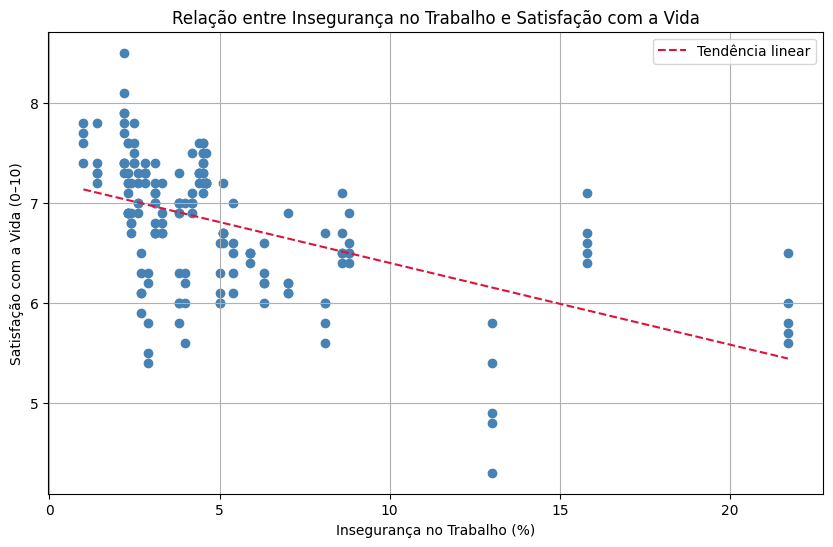

In [43]:
# Coeficientes da linha (inclinação e intercepto)
coef = np.polyfit(df["Labour Insecurity"], df["Life Satisfaction"], 1)
x_line = np.linspace(df["Labour Insecurity"].min(), df["Labour Insecurity"].max(), 100)
y_line = coef[0] * x_line + coef[1]

# Plot com linha de tendência
plt.figure(figsize=(10, 6))
plt.scatter(df["Labour Insecurity"], df["Life Satisfaction"], color='steelblue')
plt.plot(x_line, y_line, color='crimson', linestyle="--", label="Tendência linear")
plt.title("Relação entre Insegurança no Trabalho e Satisfação com a Vida")
plt.xlabel("Insegurança no Trabalho (%)")
plt.ylabel("Satisfação com a Vida (0–10)")
plt.legend()
plt.grid(True)
plt.show()

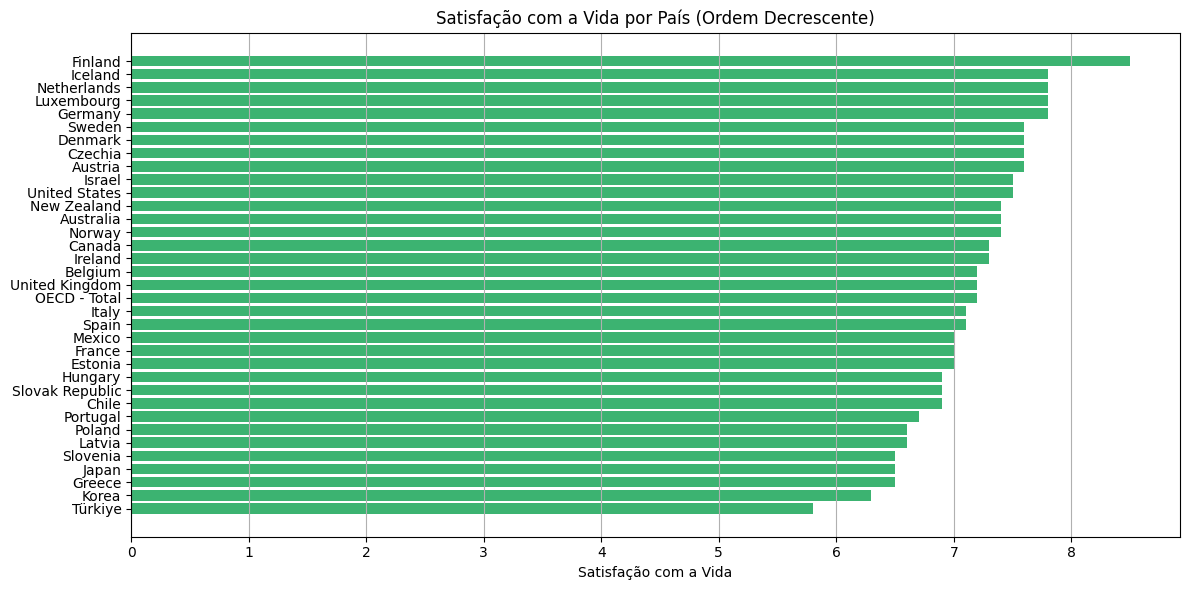

In [44]:
df_sorted = df.sort_values("Life Satisfaction", ascending=False)

plt.figure(figsize=(12, 6))
plt.barh(df_sorted["Country"], df_sorted["Life Satisfaction"], color="mediumseagreen")
plt.xlabel("Satisfação com a Vida")
plt.title("Satisfação com a Vida por País (Ordem Decrescente)")
plt.gca().invert_yaxis()  # Deixa o maior valor no topo
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()
